In [6]:
import tqdm
import fasttext
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.ensemble import IsolationForest

# 1. Load Data & Word Embedding Model

In [13]:
model_path = "Models/cbow_model.bin"
data_path = 'Data\submission_and_comments_V3.csv'
clusters_path = "Data\CBOW_KMeans_TitlesClusters_k=25-50-100-150-200-1000.csv"


all_data = pd.read_csv(data_path, sep = ";", index_col = 0)
model = fasttext.load_model(model_path)
clusters = pd.read_csv(clusters_path)

data = all_data[(all_data.submission_title != "[deleted by user]") & ~(all_data.submission_title.isna())]
concat_posts = np.array(data['submission_title'])

# 2. Load Sentiment Analysis Model

In [57]:
sentiment_pipeline = pipeline(model = "finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


# 3. Sentiment Analysis in each cluster

In [97]:
max_length = 260

data_scores = []
for post in tqdm.tqdm(concat_posts):
    dico_sentiment = sentiment_pipeline([post[: max_length]])[0]
    data_scores.append(dico_sentiment)

100%|██████████| 20514/20514 [17:14<00:00, 19.84it/s]


In [102]:
data['sentiment_label'] = [dico['label'] for dico in data_scores]
data['sentiment_score'] = [dico['score'] for dico in data_scores]
data.to_csv('Data/PostTitle_SentimentScore.csv')

C:\Users\Vincelot\AppData\Local\Temp\ipykernel_8612\838485495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_label'] = [dico['label'] for dico in data_scores]
C:\Users\Vincelot\AppData\Local\Temp\ipykernel_8612\838485495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = [dico['score'] for dico in data_scores]


# 4. Sentiment Analysis Per Cluster

## 4.1. Overall Sentiment Distributions

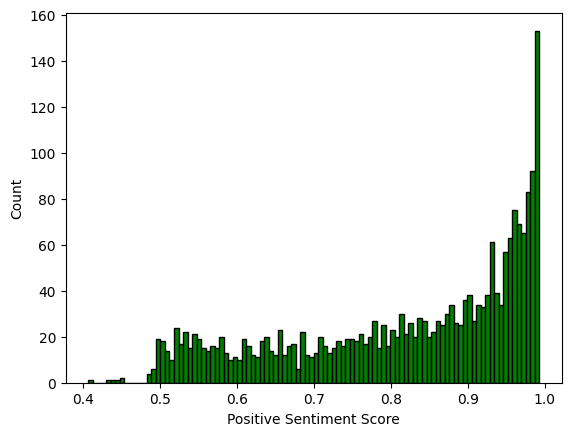

In [108]:
data[data['sentiment_label'] == "POS"]['sentiment_score'].hist(bins = 100, color =  'g', edgecolor = "k")
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Count')
plt.grid(None)

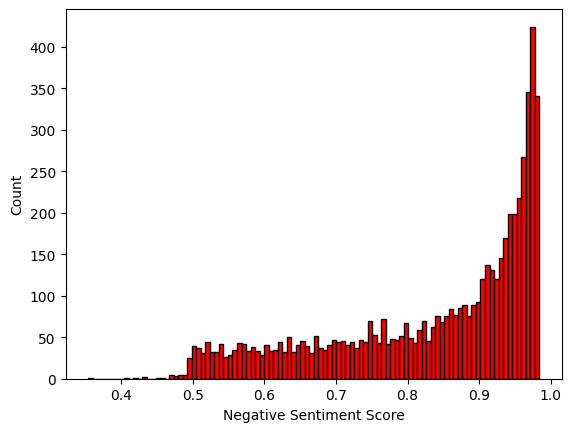

In [107]:
data[data['sentiment_label'] == "NEG"]['sentiment_score'].hist(bins = 100, color =  'r', edgecolor = "k")
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Count')
plt.grid(None)

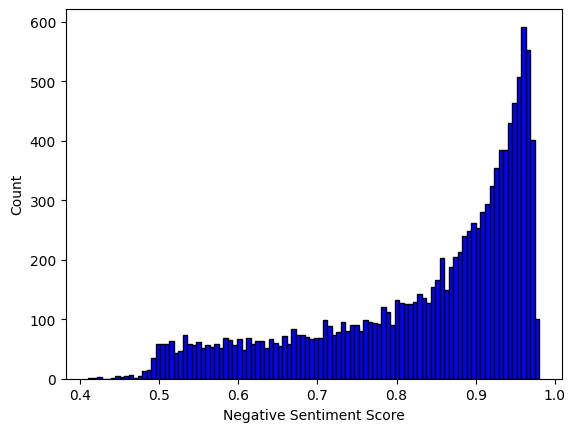

In [109]:
data[data['sentiment_label'] == "NEU"]['sentiment_score'].hist(bins = 100, color =  'b', edgecolor = "k")
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Count')
plt.grid(None)

## 4.2 Analysis Per Cluster